# UIUC CS410 Final Project - Text Classification Competition
NetID: Sembian2@illinois.edu 

SubmissionType: Individual

# Project Summary

##Install Required Libraries

In [ ]:
!pip install transformers -qq > None
!pip install wandb -qq > None
!pip install emoji -qq > None
!pip install unidecode -qq > None

##Import Libraries


In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emoji
from html.parser import HTMLParser
%matplotlib inline
import wandb
import string
import unicodedata
import unidecode
import re
import os
import re
import logging

## Import Training Data


In [ ]:
#Loading Training data to Pandas DataFrame
df = pd.read_json("https://raw.githubusercontent.com/CS410Fall2020/ClassificationCompetition/main/data/train.jsonl", lines=True)

# Data Pre-processing Pipeline
Reference:  https://www.socialmediatoday.com/content/top-twitter-abbreviations-you-need-know

In [ ]:
# Apostrophe Dictionary for commonly used forms in Twitter Tweets
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not", 
"can't": "cannot", 
"can't've": "cannot have",
"'cause": "because", 
"could've": "could have", 
"couldn't": "could not", 
"couldn't've": "could not have",
"didn't": "did not", 
"doesn't": "does not",
"don't": "do not", 
"hadn't": "had not", 
"hadn't've": "had not have",
"hasn't": "has not", 
"haven't": "have not", 
"he'd": "he had / he would", 
"he'd've": "he would have",
"he'll": "he shall / he will", 
"he'll've": "he shall have / he will have", 
"he's": "he has / he is",
"how'd": "how did", 
"how'd'y": "how do you", 
"how'll": "how will", 
"how's": "how has / how is",
"i'd": "I had / I would", 
"i'd've": "I would have", 
"i'll": "I shall / I will", 
"i'll've": "I shall have / I will have",
"i'm": "I am", "I'm": "I am", 
"i've": "I have", 
"isn't": "is not", 
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [ ]:
# Short word Dictionary for commonly used forms in Twitter Tweets 
short_word_dict = {
" 121 ": " one to one ", " a/s/l ": " age, sex, location ", " adn ": " any day now ", " afaik ": " as far as I know ",
" afk ": " away from keyboard ", " aight ": " alright ", " alol ": " actually laughing out loud ", " b4 ": "before",
" b4n ": " bye for now ", " bak ": " back at the keyboard ", " bf ": " boyfriend ", " bff ": " best friends forever ", 
" bfn ": " bye for now ", " bg ": " big grin ", " bta ": " but then again ", " btw ": " by the way ", 
" cid ": " crying in disgrace ", " cnp ": " continued in my next post ", " cp ": " chat post ", " cu ": " see you ",
" cul ": " see you later ", " cul8r ": " see you later ", " cya ": " bye ", " cyo ": " see you online ",
" dbau ": " doing business as usual ", " fud ": " fear, uncertainty, and doubt ", " fwiw ": " for what it's worth ",
" fyi ": " for your information ", " g ": " grin ", " g2g ": " got to go ", " ga ": " go ahead ", " gal ": " get a life ",
" gf ": " girlfriend ", " gfn ": " gone for now ", " gmbo ": " giggling my butt off ", " gmta ": " great minds think alike ",
" h8 ": " hate ", " hagn ": " have a good night ", " hdop ": " help delete online predators ", " hhis ": " hanging head in shame ",
" iac ": " in any case ", " ianal ": " I am not a lawyer ", " ic" : " I see ", " idk ": " I don't know ",
" imao ": " in my arrogant opinion ", " imnsho ": "i n my not so humble opinion ", " imo ": " in my opinion ",
" iow ": " in other words ", " ipn ": " I’m posting naked ", " irl ": " in real life ", " jk ": " just kidding ",
" l8r ": " later ", " ld ": " later, dude ", " ldr ": " long distance relationship ", " llta ": " lots and lots of thunderous applause ",
" lmao ": " laugh my ass off ", " lmirl ": " let's meet in real life ", " lol ": " laugh out loud ", 
" ltr ": " longterm relationship ", " lulab ": " love you like a brother ", " lulas ": " love you like a sister ",
" luv ": " love ", " m/f ": " male or female ", " m8 ": " mate ", " milf ": " mother I would like to fuck ", 
" oll ": " online love ", " omg ": " oh my god ", " otoh ": " n the other hand ", " pir ": " parent in room ", 
" ppl ": " people ", " r ": " are ", " rofl ": " roll on the floor laughing ", " rpg ": " role playing games ",
" ru ": " are you " , " shid ": " slaps head in disgust ", " somy ": " sick of me yet ", " sot ": " short of time ",
" thanx ": " thanks ", " thx ": " thanks ", " ttyl ": " talk to you later ", " u ": " you ", " ur ": " you are ",
" uw ": " you’re welcome ", " wb ": " welcome back ", " wfm ": " works for me ", " wibni ": " wouldn't it be nice if ",
" wtf ": " what the fuck ", " wtg ": " way to go ", " wtgp ": " want to go private ", " ym ": "young man ", " gr8 ": " great ", ' rt ': "re tweet",
" im " : "i am", " iv ": " i have ", " int'l ": " international ", " & ": " and "
}


In [ ]:
username_regex = re.compile(r'(^|[^@\w])@(\w{1,15})\b')
url_regex = re.compile(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))')
control_char_regex = re.compile(r'[\r\n\t]+')
# translate table for punctuation
transl_table = dict([(ord(x), ord(y)) for x, y in zip(u"‘’´“”–-",  u"'''\"\"--")])
# HTML parser
html_parser = HTMLParser()
transl_table = dict([(ord(x), ord(y)) for x, y in zip(u"‘’´“”–-",  u"'''\"\"--")])

##Tweet Pre-Processing

In [ ]:
def standardize_text(text):
    """
    1) Escape HTML
    2) Replaces some non-standard punctuation with standard versions. 
    3) Replace \r, \n and \t with white spaces
    4) Removes all other control characters and the NULL byte
    5) Removes duplicate white spaces
    """
    # escape HTML symbols
    text = html_parser.unescape(text)
    # standardize punctuation
    text = text.translate(transl_table)
    text = text.replace('…', '...')
    
    # replace \t, \n and \r characters by a whitespace
    text = re.sub(control_char_regex, ' ', text)
    # remove all remaining control characters
    text = ''.join(ch for ch in text if unicodedata.category(ch)[0] != 'C')
    # replace multiple spaces with single space
    text = ' '.join(text.split())
    return text.strip()

def standardize_punctuation(text):
    return ''.join([unidecode.unidecode(t) if unicodedata.category(t)[0] == 'P' else t for t in text])

def asciify_emojis(text):
    """
    Converts emojis into text aliases. E.g. 👍 becomes :thumbs_up:
    For a full list of text aliases see: https://www.webfx.com/tools/emoji-cheat-sheet/
    """
    text = emoji.demojize(text)
    return text

def remove_accented_characters(text):
    text = unidecode.unidecode(text)
    return text

def remove_unicode_symbols(text):
    text = ''.join(ch for ch in text if unicodedata.category(ch)[0] != 'So')
    return text

def lowercase_tweets(tweet):
  text = tweet.lower()
  return text

def striptext(text):
    text = remove_unicode_symbols(text)
    text = remove_accented_characters(text)
    text = asciify_emojis(text)
    text = standardize_punctuation(text)
    text = standardize_text(text)
    return text

def tag_cleaner(text):
    no_tags = ''.join(text).replace('@USER', '').replace('<URL>','')
    #no_tags = demoji.replace_with_desc(no_tags)
    return no_tags
                                                         
def label_to_binary(text):
    if text == "SARCASM":
        lbinary = 0
    else:
        lbinary = 1
        
    return lbinary

In [ ]:
df['response'] = df['response'].apply(lambda x: tag_cleaner(x))
df['response'] = df['response'].apply(lambda x: lowercase_tweets(x))
df['response'] = df['response'].replace(short_word_dict, regex=True)
df['response'] = df['response'].replace(apostrophe_dict, regex=True)

df['response'] = df['response'].apply(lambda x: striptext(x))
df['label'] = df['label'].apply(lambda x: label_to_binary(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df.sample(5)

,label,response,context
1721,0,sounds legit . may or may not be possible with...,[Excited about some upcoming playoff matchups ...
3043,1,nothing better than being in hell ... eating a...,"[@USER Qasem are you in heaven or in hell ?, @..."
3453,1,"the bible is not political , it is theocratic ...","[God does not belong to a political party ., @..."
3033,1,our fa from auh > kuala lumpur ( flt 418 ) - m...,"[Have to say , those were some of the best inf..."
4472,1,thats why we are coming to save you q,"[Dear Iran , Here ’ s the map incase your conf..."


## Split Train and Validation

In [ ]:
from sklearn.model_selection import train_test_split

X = df.response.values
y = df.label.values

X_train, X_val, y_train, y_val =\
    train_test_split(X, y, test_size=0.33, random_state=2020)

##Loading Test Data

In [ ]:
test_data = pd.read_json("https://raw.githubusercontent.com/CS410Fall2020/ClassificationCompetition/main/data/test.jsonl", lines=True)
test_data = test_data[['id', 'response','context']]
test_data['response'] = test_data['response'].apply(lambda x: tag_cleaner(x))
test_data['response'] = test_data['response'].apply(lambda x: lowercase_tweets(x))
test_data['response'] = test_data['response'].replace(short_word_dict, regex=True)
test_data['response'] = test_data['response'].replace(apostrophe_dict, regex=True)
test_data['response'] = test_data['response'].apply(lambda x: striptext(x))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
test_data.sample(1)

,id,response,context
217,twitter_218,well the only difference between harvey weinst...,[@USER @USER @USER you've instigated him to us...


##GPU Setup

In [ ]:
import torch
import numpy as np
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


## Text Processing

In [ ]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    
    s = re.sub(r"\'t", " not", s)
 

    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Baseline Model using TF-IDF Vectorizer

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 9.78 s, sys: 994 ms, total: 10.8 s
Wall time: 10.8 s


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

## Baseline Multinomial Naive Bayes Model
C.D. Manning, P. Raghavan and H. Schuetze (2008). Introduction to Information Retrieval. Cambridge University Press, pp. 234-265. https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html

Best alpha:  1.8


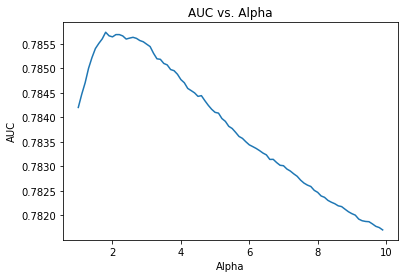

In [ ]:
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the validation set - Compute Area Under the Curve (AUC) using the trapezoidal rule
    - Plot ROC - Compute Receiver operating characteristic (ROC)
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds > 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.8118
Accuracy: 72.24%


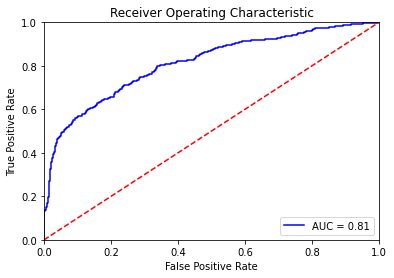

In [ ]:
# Compute predicted probabilities - Naive Bayes classifier for multinomial models
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

# Setup BERT Model

In [ ]:
def text_preprocessing_bert(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

## BERT Tokenizer with Attention

In [ ]:
from transformers import BertTokenizer, AutoTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            #text=text_preprocessing_bert(sent),  # Preprocess sentence
            text=text_preprocessing_bert(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask=True      # Return attention mask
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
train_response_context = np.concatenate([df.response.values, df.context.values])
train_response_context[1]

'trying to protest about . talking about him and his labels and they label themselves what the fuck does that make em ?'

In [ ]:
# Concatenate train data and test data
all_tweets = np.concatenate([df.response.values, test_data.response.values])

# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# Find the maximum length from both train and test dataset
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  89


In [ ]:
# Specify `MAX_LEN`
MAX_LEN =89

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  i do not get this .. obviously you do care or you would have moved right along .. instead you decided to care and troll her ..
Token IDs:  [101, 1045, 2079, 2025, 2131, 2023, 1012, 1012, 5525, 2017, 2079, 2729, 2030, 2017, 2052, 2031, 2333, 2157, 2247, 1012, 1012, 2612, 2017, 2787, 2000, 2729, 1998, 18792, 2014, 1012, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


## Data Loaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)


# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


## Bert Classifier Setup

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
#Bert Model Architecture
#BERT’s model architecture is a multi-layer bidirectional Transformer encoder
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        # BERT-Large, Uncased: 24-layer, 1024-hidden, 16-heads, 340M parameters
        D_in, H, D_out = 1024, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-large-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),   #https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
            nn.ReLU(), #https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
            nn.Linear(H, D_out), #https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 55 µs, sys: 3 µs, total: 58 µs
Wall time: 61.3 µs


## Setup BERT Model - Optimizer and Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8,    # Default epsilon value
              
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

## Training and Evaluation - Train and Validation

In [ ]:
import random
import time
import wandb

config = {
  "learning_rate": 0.01,
  "batch_size": 32,
  "epochs": 3,
}

# Specify loss function - https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=10, evaluation=False):
    """Train the BertClassifier model.
    """

    wandb.init(
      name="CS410 Course Project",  
      notes="Course Project",
      tags=["baseline", "bert-uncased-large"], 
      config={"epochs": 4, "batch_size": 32, "learning_rate":5e-5, "max_seq_length":89}
    )
    wandb.watch(model)
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()
        
        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()
            wandb.log({'train_batch_loss':loss.item()})
            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()
            
            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        wandb.log({'avg_train_loss':avg_train_loss})
        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            wandb.log({'val_loss':val_loss.item()})
            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        wandb.log({'val_batch_loss':loss.item()})
        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)
        wandb.log({'val_batch_accuracy':accuracy})

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)
    wandb.log({'val_accuracy':val_accuracy})
    return val_loss, val_accuracy

## Training Loop 

In [ ]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=4)
train(bert_classifier, train_dataloader, val_dataloader, epochs=4, evaluation=True)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.664404   |     -      |     -     |   31.24  
   1    |   40    |   0.534449   |     -      |     -     |   30.31  
   1    |   60    |   0.533544   |     -      |     -     |   30.93  
   1    |   80    |   0.500559   |     -      |     -     |   31.50  
   1    |   100   |   0.479444   |     -      |     -     |   32.01  
   1    |   104   |   0.415712   |     -      |     -     |   5.98   
----------------------------------------------------------------------
   1    |    -    |   0.538812   |  0.444033  |   79.88   |  191.51  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.291500   |     -      |     -     |   34.

## Predictions Setup

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

# Validation Predictions

AUC: 0.8887
Accuracy: 81.15%


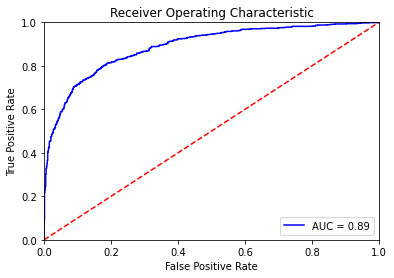

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [ ]:
from sklearn.metrics import classification_report
# Compute predicted probabilities on the test set
preds = bert_predict(bert_classifier, val_dataloader)
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(val_labels, preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       832
           1       0.81      0.81      0.81       818

    accuracy                           0.81      1650
   macro avg       0.81      0.81      0.81      1650
weighted avg       0.81      0.81      0.81      1650



## Training on Full Data Set Train + Validation

In [ ]:
# Concatenate the train set and the validation set
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=32)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, full_train_dataloader, epochs=2)

train_batch_loss,0.27079
_step,847
_runtime,805
_timestamp,1606674658
avg_train_loss,0.0398
val_batch_loss,0.73128
val_batch_accuracy,83.33333
val_accuracy,81.16987
val_loss,0.84605


train_batch_loss,▇▆▆▆█▄▃▅▆▅▃▃▄▃▂▅▃▅▂▃▂▂▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▃
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇██████
_timestamp,▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇██████
avg_train_loss,█▄▂▁
val_batch_loss,▂▂▃▁▂▁▁▂▂▁▄▅▃▃▆▂▃▂▄▂▃▅▇▆▃▅▃▂▄▃▄▆█▇▃▆▄▃▃▄
val_batch_accuracy,▄▆▂▇▃█▅▃▅▇▃▁▄▅▂▅▃▅▃▆▅▃▂▅▆▃▅▆▅▆▅▅▃▅▅▄▅▇▅▆
val_accuracy,▅▁▃█
val_loss,▁▃▆█


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.606887   |     -      |     -     |   33.49  
   1    |   40    |   0.559485   |     -      |     -     |   32.54  
   1    |   60    |   0.500468   |     -      |     -     |   32.70  
   1    |   80    |   0.477995   |     -      |     -     |   32.85  
   1    |   100   |   0.450880   |     -      |     -     |   33.06  
   1    |   120   |   0.407266   |     -      |     -     |   33.14  
   1    |   140   |   0.465528   |     -      |     -     |   33.22  
   1    |   156   |   0.422632   |     -      |     -     |   25.49  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.293666   |     -      |     -     |   35.0

#Predictions on Validation after Full Training

In [ ]:
from sklearn.metrics import classification_report
# Compute predicted probabilities on the test set
preds = bert_predict(bert_classifier, val_dataloader)
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(val_labels, preds))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       832
           1       0.96      0.86      0.91       818

    accuracy                           0.91      1650
   macro avg       0.92      0.91      0.91      1650
weighted avg       0.92      0.91      0.91      1650



## Saving BERT Model

In [ ]:
torch.save(bert_classifier,'sarcasm_model-r2.pt')



##Predictions on Test Data

In [ ]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(test_data.response)

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

Tokenizing data...


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

In [ ]:
arg = probs.argmax(-1)
arg_probs_df = pd.DataFrame(data=arg)
arg_probs_df.sample(10)
def predict_sarcasm(row):
    
    if row[0] == 0:
        label = "SARCASM"
    if row[0] == 1:
        label = "NON_SARCASM"
        
    return label
arg_probs_df['label_ids'] = arg_probs_df.apply(lambda row: predict_sarcasm(row), axis=1)
arg_probs_df.rename(columns={0:"preds"}, inplace=True)

arg_probs_df["preds"].values

array([1, 0, 0, ..., 1, 1, 1])

## Saving Predictions

In [ ]:
probs_df = pd.DataFrame(data=probs)
result = pd.concat([test_data, probs_df], axis=1, sort=False)


In [ ]:
def prodict_sarcasm(row):
    threshold = .5
    label = ''
    if row[0] > threshold:
        label = "SARCASM"
    if row[1] > threshold:
        label = "NON_SARCASM"
        
    return label
result['label'] = result.apply(lambda row: prodict_sarcasm(row), axis=1)

In [ ]:
final = result.drop(['response','context', 0,1], axis=1)
final.reset_index(drop=True, inplace=True) 
final.to_csv(r'answer.txt', header=None, index=None, sep=',', mode='a')

#References

1. Weights and Biases: https://wandb.ai/cayush/bert-finetuning/reports/Sentence-Classification-With-Huggingface-BERT-and-W-B--Vmlldzo4MDMwNA
2. The Role of Conversation Context for Sarcasm Detection in Online Interactions: https://arxiv.org/pdf/1707.06226.pdf
3. Clark, Kevin, Urvashi Khandelwal, Omer Levy, and Christopher D. Manning. "What does bert look at? an analysis of bert's attention." arXiv preprint arXiv:1906.04341 (2019).
4. Sileo, Damien. "Understanding bert transformer: Attention isnt all you need." Towards Data Science (2019).
5. Weiss, Karl, Taghi M. Khoshgoftaar, and DingDing Wang. "A survey of transfer learning." Journal of Big data 3, no. 1 (2016): 9.
6. Biewald, Lukas. "Experiment Tracking with Weights and Biases." (2020). 
7. Text Tweet Pre processing - https://github.com/digitalepidemiologylab
8. The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning) -  https://jalammar.github.io/illustrated-bert/
9. Pytorch.org - https://pytorch.org/docs/stable/index.html
10. BERT Fine-Tuning Tutorial with PyTorch for Text Classification: https://medium.com/@aniruddha.choudhury94/part-2-bert-fine-tuning-tutorial-with-pytorch-for-text-classification-on-the-corpus-of-linguistic-18057ce330e1
11. Huggingface transformers library - https://github.com/huggingface/transformers
12. BERT for Advance NLP with Transformers in Pytorch - https://www.linkedin.com/pulse/part1-bert-advance-nlp-transformers-pytorch-aniruddha-choudhury/
13. Attention Is All You Need; Vaswani et al., 2017. - https://arxiv.org/pdf/1706.03762.pdf
14. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding; Devlin et al., 2018. - https://arxiv.org/pdf/1810.04805.pdf
15. Encoder-Decoder Architecture& Bert Paperon the full research. - https://arxiv.org/pdf/1810.04805.pdf